In [1]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [11]:
# Add an additional column, mapping to the type
df = pd.read_csv(r'dataset/output.csv')

diagnosis_dict_binary = {
     1: 'Guttate',
   
}

diagnosis_dict = {
    1: 'Guttate',
   
}


df['binary_type'] =  df['type'].map(diagnosis_dict_binary.get)
df['type'] = df['type'].map(diagnosis_dict.get)
df.head()

id_code  type binary_type
0  aitcsdtqap  None        None
1  akpamjetze  None        None
2  aonnhzxqvg  None        None
3  arsqdqvonv  None        None
4  atzkvuaahb  None        None

<Axes: ylabel='type'>

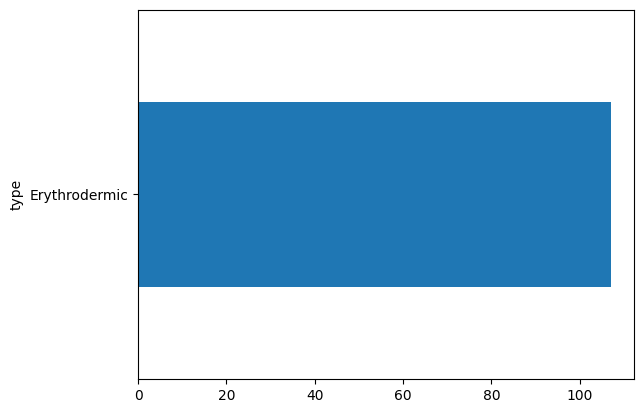

In [6]:
df['type'].value_counts().plot(kind='barh')

<Axes: ylabel='binary_type'>

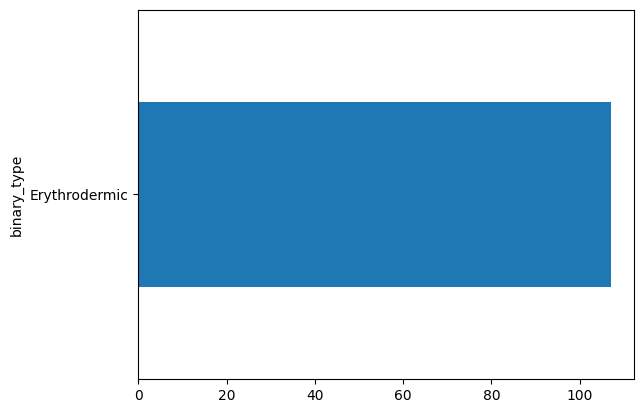

In [7]:
df['binary_type'].value_counts().plot(kind='barh')

In [8]:
# Split into stratified train, val, and test sets
train_intermediate, val = train_test_split(df, test_size=0.15, stratify=df['type'])

# Calculate the proportion of data to be allocated to the test set
test_proportion = 0.1  # For example, you can reduce the test size to 10%

# Split the remaining data into train and test with test_proportion
train, test = train_test_split(train_intermediate, test_size=test_proportion, stratify=train_intermediate['type'])

print(train['type'].value_counts(), '\n')
print(test['type'].value_counts(), '\n')
print(val['type'].value_counts(), '\n')

TypeError: '<' not supported between instances of 'NoneType' and 'str'

In [9]:
# Create working directories for train/val/test
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

In [10]:
src_dir = r'dataset'

for index, row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".JPG"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok=True)
    try:
        shutil.copy(srcfile, dstfile)
    except FileNotFoundError:
        print(f"File not found: {srcfile}")

for index, row in val.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".JPG"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(val_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok=True)
    try:
        shutil.copy(srcfile, dstfile)
    except FileNotFoundError:
        print(f"File not found: {srcfile}")
 
for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".JPG"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok=True)
    try:
        shutil.copy(srcfile, dstfile)
    except FileNotFoundError:
        print(f"File not found: {srcfile}")


NameError: name 'train' is not defined